<a href="https://colab.research.google.com/github/AnikaitLakhotia/Machine-Learning/blob/main/fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [ ]:
# Load data
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Separate and reshape training and validation sets
x_valid1, x_train1 = x_train_full[:10000]/255.0 , x_train_full[10000:]/255.0
y_valid, y_train = y_train_full[:10000], y_train_full[10000:]
x_train = x_train1.reshape(50000,28,28,1)
x_valid = x_valid1.reshape(10000,28,28,1)

In [ ]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [ ]:
# Callbacks
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20,
 restore_best_weights=True)

ReduceOnPlateau = keras.callbacks.ReduceLROnPlateau(
monitor='val_loss',
factor=0.1,
patience=10,
)

root_logdir = os.path.join(os.curdir, "my_logs2")
def get_run_logdir():
 import time
 run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
 return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [ ]:
# Model architecture
from functools import partial
DefaultConv2D = partial(keras.layers.Conv2D,
 kernel_size=3, activation='relu', padding="SAME",kernel_initializer="he_normal",
 kernel_regularizer=keras.regularizers.l2(0.01))
model = keras.models.Sequential([
 DefaultConv2D(filters=64, kernel_size=7, input_shape=[28,28,1]),
 layers.BatchNormalization(),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=128),
 layers.BatchNormalization(),
 DefaultConv2D(filters=128),
 layers.BatchNormalization(),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=256),
 layers.BatchNormalization(),
 DefaultConv2D(filters=256),
 layers.BatchNormalization(),
DefaultConv2D(filters=512),
 layers.BatchNormalization(),
 DefaultConv2D(filters=512),
 layers.BatchNormalization(),
 keras.layers.MaxPooling2D(pool_size=2),
 keras.layers.Flatten(),
 keras.layers.Dense(units=128, activation='relu'),
 layers.BatchNormalization(),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(units=64, activation='relu'),
 layers.BatchNormalization(),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
# Model Compilation
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [ ]:
# Model Training
history = model.fit(x_train, y_train, epochs=1000,
 validation_data=(x_valid, y_valid),
 callbacks=[tensorboard_cb,early_stopping_cb,ReduceOnPlateau])

Epoch 1/1000
1563/1563 [==============================] - 28s 17ms/step - loss: 28.4778 - accuracy: 0.7639 - val_loss: 20.4076 - val_accuracy: 0.8677 - lr: 0.0100
Epoch 2/1000
1563/1563 [==============================] - 26s 17ms/step - loss: 15.4053 - accuracy: 0.8508 - val_loss: 11.1330 - val_accuracy: 0.8878 - lr: 0.0100
Epoch 3/1000
1563/1563 [==============================] - 27s 17ms/step - loss: 8.4895 - accuracy: 0.8696 - val_loss: 6.2089 - val_accuracy: 0.8831 - lr: 0.0100
Epoch 4/1000
1563/1563 [==============================] - 26s 17ms/step - loss: 4.7922 - accuracy: 0.8821 - val_loss: 3.5314 - val_accuracy: 0.9019 - lr: 0.0100
Epoch 5/1000
1563/1563 [==============================] - 27s 17ms/step - loss: 2.8126 - accuracy: 0.8873 - val_loss: 2.2027 - val_accuracy: 0.8665 - lr: 0.0100
Epoch 6/1000
1563/1563 [==============================] - 27s 17ms/step - loss: 1.7622 - accuracy: 0.8912 - val_loss: 1.4414 - val_accuracy: 0.8704 - lr: 0.0100
Epoch 7/1000
1563/1563 [======

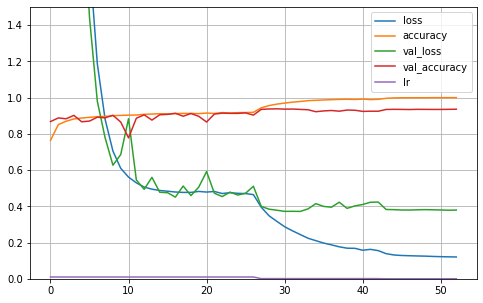

In [ ]:
# Plot Metrics
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5) # set the vertical range to [0-1]
plt.show()